# Exploratory data analysis
Introduction to exploratory data analysis (EDA).

EDA is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task [(source 1)](https://chartio.com/learn/data-analytics/what-is-exploratory-data-analysis/). It is used to explore the data, find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques, and possibly formulate hypotheses that could lead to new data collection and experiments [(source 2)](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/). More specifically, EDA enables analysts to:
1. get maximum insights from a data set
2. uncover underlying structure
3. extract important variables from the dataset
4. detect outliers and anomalies (if any)
5. test underlying assumptions
6. determine the optimal factor settings

## EDA steps and tools
Practical steps in conducting EDA and frequently used EDA tools.
Based on *pandas2020-main.Sales_Analysis_Pandas_P3_tutorial.ipynb* and *pandas2020-main.TED_Talks_Pandas_P3_tutorial.ipynb*.


Based on [this](https://stackoverflow.com/a/22149930/1899061), in all computations, `axis=...` refers to the axis **along which** the computation is done. By default, `axis=0`. This is consistent with the `numpy.mean` usage when axis is specified explicitly (in `numpy.mean`, `axis==None` by default, which computes the mean value over the flattened array), in which `axis=0` along the rows (namely, index in pandas), and `axis=1` along the columns.
Note also that that `axis=0` indicates aggregating along rows and `axis=1` indicates aggregating along columns. This is consistent with how we index into a dataframe. In `df.iloc[<row>, <column>]`, `<row>` is in index position 0 and `<column>` is in index position 1. For added clarity, one may choose to specify `axis='index'` (instead of `axis=0`) or `axis='columns'` (instead of `axis=1`).
**But**, `axis=0` means each row as a bulk - we manipulate a `pd.DataFrame` inter-row, instead of within-row. Likewise, 1 means each column as a bulk, i.e. we manipulate a `pd.DataFrame` inter-column instead of within-column. For example, `<pd.df>.drop("A", axis=1)` will drop a whole column.

### Reading the dataset
- `pd.read_csv()`

### Initial examination and adaptations
- `<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, `<pd.df>.info()`, `<pd.df>.describe()`
- `<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()`, `<pd.df>.values`
- `<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>)
- `ast.literal_eval()` (using Python's *ast* module to transform a string into a literal value, a list, a tuple or any other container object)

### Missing values and value counts
- `<pd.df>.isna()` (`<pd.df>.isnull()`), `<pd.df>.isna().sum()` (`<pd.df>.isnull().sum`) ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
- `sb.heatmap()`, e.g. `sb.heatmap(<pd.df>.isnull(),cbar=False,cmap='viridis')` ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
- `<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts(normalize=True)`, `<pd.Series>.dropna(how='all'/'any', inplace=True)`

### Examining individual data items, rows and columns
- `<pd.df>.sample()`
- Simple indexing and fancy indexing: `<pd.df>.iloc[]`, `<pd.df>.loc[]`
- `<pd.df>.index`, `<pd.df>.index[<from>:<to>]`, `<pd.df>.reset_index(drop=True, inplace=True)`
- Indexing using list of values: `<pd.df>.loc[<pd.df>.<column>.isin(<list of values>)]` (select those observations where the value of `<column>` is in the `<list of values>`)
- Indexing in data stats: `<pd.df>.describe().loc['50%', '<column_name>']` (select the median of `<column_name>` from the `<pd.df>` stats computed by `describe()`)

### Grouping and sorting data
- `<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`
- `<pd.df>['<column>'].groupby()`, `<pd.df>['<column>'].groupby().get_group()`
- `<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts().sort_index()`, `<pd.df>['<column>'].value_counts().sort_index(inplace=True)`
- `<pd.df>.sort_values(by='<column name>', ascending=False/True)`
- `<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`)
- `<pd.df>.groupby('<column>').<another column>.agg(['<f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`,...)

If `sort_values()` is used after `agg(['f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.


### Data transformations
- `<pd.df>.describe()`
- `pd.to_numeric(<pd.DataFrame object>['<column name>'], errors='coerce')`, `pd.DataFrame.to_numpy()`, `pd.Series.to_numpy()`, `pd.to_datetime()`, ...
- `<pd.df>.<column>.apply(<f_name>)` (apply the <f_name> function to all elements of each element of the `<column>`; for example, each element of the `<column>` can be a list of other elements)


### Exploring correlations
Explore correlations between the (numerical) columns.
- `sb.heatmap()`
- [Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Data visualization
Plot some bargraphs, scatterplots, boxplots,...
- [Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Other
[Other interesting ideas and different ways of using the things from above](https://realpython.com/pandas-python-explore-dataset/#exploring-your-dataset) (see the rest from [that article](https://realpython.com/pandas-python-explore-dataset/) as well).

## Import and configure packages
The `%run` magic does not work well in DataSpell, thus the following `import` statements are copied here from *import_packages.ipynb* (the last line is added subsequently):

In [54]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%config IPCompleter.greedy=True

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import pandas as pd
import seaborn as sb

from plotnine import ggplot, aes, labs, geom_point, geom_line, geom_histogram, theme_xkcd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# %run "import_packages.ipynb"

## Introducing The Rolling Stones datasets

### Available datasets
The starting set of The Rolling Stones datasets, located in the *data* folder:
* *rolling_stones_spotify.csv* - Spotify audio features collected from playlists
* *stones.csv* - complete raw dataset (including data from Spotify, Wikipedia, AllMusic, etc.)
* *stones_analysis.csv* - clean dataset (no NAs, no duplicates,...)

### Read a *csv* file containing one of the available datasets describing The Rolling Stones songs
`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [170]:
# Get the songs as a pd.DataFrame object from 'data/stones.csv', 
# or from '../data/stones.csv', 
# or '../../data/stones.csv', 
# or ..., 
# depending on where the csv file is located

songs = pd.read_csv('data/stones.csv')
# If an int columns contains NaN values, read_csv() sets all values to float values, because NaN are internally
# represented as float values. To read the int columns as int values and still preserve NaN values where they 
# exist, see this: https://stackoverflow.com/a/72323514. 
# The trick is: df = pd.read_csv('file.csv', dtype={'a': 'Int32', 'b': 'Int32'}), assuming that 'a' and 'b' 
# columns contain int and NaN values.

### Explore the dataset (first steps)

##### Initial examination and adaptations
- `<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, `<pd.df>.info()`, `<pd.df>.describe()`
- `<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()` (or `<pd.df>.columns.values.to_list()`), `<pd.df>.values`
- `<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>)
- `ast.literal_eval()` (using Python's *ast* module to transform a string into a literal value, a list, a tuple or any other container object)

###### A sneak peek into the dataset
- `<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, **<u>`<pd.df>.info()`**</u>, `<pd.df>.describe()` (shows descriptive statistics for numerical columns only).

When calling `display()` on a method like `<pd.df>.head()`, `<pd.df>.tail()` and `<pd.df>.sample()`, only a certain default number of columns is displayed. To display *all* columns, use `pd.set_option('display.max_columns', None)` first. To display *<n>* columns, use `pd.set_option('display.max_columns', <n>)` first. 

In [14]:
display(songs.shape)
# display(songs.head())
# display(songs.tail())
pd.set_option('display.max_columns', 10)
display(songs.sample(10))
pd.set_option('display.max_columns', None)
display(songs.sample(10))
# display(songs.dtypes)
display(songs.info())

(297, 36)

,Unnamed: 0,Title,Year_recorded,Year_released,Album,...,FRA,SWI,CAN,POL,Certification
262,262,Time Is On My Side,1964,1964,Got Live If You Want It!,...,4,3,-,-,-
7,7,All Down The Line,1972,1972,Exile on Main St.,...,-,-,-,-,-
61,61,Doncha Bother Me,1965,1966,Aftermath,...,-,-,-,-,-
155,155,Love In Vain,1969,1969,Get Yer Ya-Ya's Out!,...,-,-,-,-,-
75,75,Fingerprint File,1974,1974,It's Only Rock 'n' Roll,...,-,-,-,-,-
137,137,Lady Jane,1966,1966,Flowers,...,-,-,-,-,-
269,269,Torn And Frayed,1971,1972,Exile on Main St.,...,-,-,-,-,-
3,3,2000 Man,1967,1967,Their Satanic Majesties Request,...,-,-,-,-,-
162,162,Melody,1975,1976,Black and Blue,...,-,-,-,-,-
144,144,Let's Spend The Night Together,1966,1967,Flowers,...,3,-,-,-,-


,Unnamed: 0,Title,Year_recorded,Year_released,Album,Record Label,Album_type,Track_number,Duration,Songwriter(s),Lead_vocal,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,British_charts,Date,UK_peak_pos,WoC,Weeks_at_no_1,US_cash,US_rec_world,AUS,US,GER,NLD,FRA,SWI,CAN,POL,Certification
28,28,Blinded By Rainbows,1994,1994,Voodoo Lounge,Virgin,Studio,12.0,04:33,Jagger/Richards,Jagger,0.688000,0.332,0.472000,0.000556,0.1160,-8.183000,0.042400,89.811000,0.2610,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
82,82,Going To A Go-Go,1981,1982,Still Life,Virgin,Live,6.0,03:21,Smokey Robinson/Pete Moore/Bobby Rogers/Marvin...,Jagger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,-,-,-,-,-,-,48,25,-,3,-,9,4,-,-
135,135,Just Your Fool,2015,2016,Blue & Lonesome,Interscope / Polydor,Studio,1.0,02:16,Buddy Johnson,Jagger,0.329000,0.547,0.903000,0.216000,0.3880,-3.832000,0.057900,116.152000,0.8420,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
240,240,Streets Of Love,2004,2005,A Bigger Bang,Virgin,Studio,5.0,05:10,Jagger/Richards,Jagger,0.041600,0.434,0.603000,0.000006,0.6530,-4.995000,0.031200,81.755000,0.2130,Yes,-,-,-,-,-,-,-,-,15,5,-,21,-,21,-
219,219,She Was Hot,1982,1983,Shine a Light,Interscope,Live,3.0,04:44,Jagger/Richards,Jagger,0.031400,0.487,0.966000,0.094900,0.0914,-4.290000,0.057700,151.781000,0.7210,Yes,11.02. 1984,42,04,00,-,-,60,44,54,18,-,-,-,-,-
224,224,Sing This All Together,1967,1967,Their Satanic Majesties Request,ABKCO Records,Studio,1.0,03:46,Jagger/Richards,Jagger,0.781000,0.572,0.707000,0.000844,0.5370,-12.124000,0.050100,121.900000,0.5540,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
284,284,Wild Horses,1969,1971,Sticky Fingers,Virgin,Studio,3.0,05:44,Jagger/Richards,Jagger,0.687000,0.432,0.389000,0.010700,0.0788,-6.517000,0.025500,139.506000,0.1580,Yes,-,-,-,-,18,21,-,28,-,-,-,-,11,-,UK: Gold[17]
263,263,Time Waits For No One,1973,1974,It's Only Rock 'n' Roll,Virgin,Studio,5.0,06:38,Jagger/Richards,Jagger,0.078400,0.533,0.781000,0.000273,0.0630,-4.602000,0.031600,118.316000,0.8150,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
106,106,Honky Tonk Women,1969,1969,Get Yer Ya-Ya's Out!,ABKCO Records,Live,9.0,03:34,Jagger/Richards,Jagger,0.009480,0.343,0.974000,0.001780,0.7480,-3.690000,0.063800,122.223000,0.8100,Yes,15.07. 1969,01,17,05,1,1,-,1,2,4,13,1,2,-,RIAA: Gold[60]
120,120,I've Been Loving You Too Long,1965,1966,Got Live If You Want It!,ABKCO Records / Universal,Live,5.0,02:55,Otis Redding/Jerry Butler,Jagger,0.418333,0.289,0.561667,0.113667,0.4370,-9.457667,0.046633,139.897333,0.0427,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        297 non-null    int64  
 1   Title             297 non-null    object 
 2   Year_recorded     297 non-null    int64  
 3   Year_released     297 non-null    int64  
 4   Album             297 non-null    object 
 5   Record Label      297 non-null    object 
 6   Album_type        297 non-null    object 
 7   Track_number      293 non-null    float64
 8   Duration          293 non-null    object 
 9   Songwriter(s)     297 non-null    object 
 10  Lead_vocal        297 non-null    object 
 11  acousticness      281 non-null    float64
 12  danceability      281 non-null    float64
 13  energy            281 non-null    float64
 14  instrumentalness  281 non-null    float64
 15  liveness          281 non-null    float64
 16  loudness          281 non-null    float64
 1

None

###### Columns
- `<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()` (or `<pd.df>.columns.values.to_list()`), `<pd.df>.values`

Show the columns of the `songs` object (which is a `pd.DataFrame` object).

In [15]:
# Get the columns as a pd.Index object, using <pd.df>.columns
songs.columns
# Get the columns as a list, using list(<pd.df>.columns)
list(songs.columns)
# Get the columns as a numpy.ndarray object, using <pd.df>.columns.values or np.array(<pd.df>.columns)
songs.columns.values
# Get the columns as a list, using <pd.df>.columns.tolist() or <pd.df>.columns.to_list()
songs.columns.to_list()
# Get the values of all items in the dataset as a numpy.ndarray of lists of the values in each item, using <pd.df>.values (the type is numpy.ndarray)
type(songs.values)
songs.values

array([[0, '19th Nervous Breakdown', 1965, ..., '9', '-', '-'],
       [1, '100 Years Ago', 1972, ..., '-', '-', '-'],
       [2, '2000 Light Years From Home', 1967, ..., '-', '-', '-'],
       ...,
       [294, 'You Got Me Rocking', 1993, ..., '29', '32', '-'],
       [295, 'You Got The Silver', 1969, ..., '-', '-', '-'],
       [296, 'You Gotta Move', 1969, ..., '-', '-', '-']], dtype=object)

###### Renaming columns
- `<pd.df>.rename(columns={'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, inplace=True)`, or
- `<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns', inplace=True)`;
- `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in `<pd.df>`)

In [8]:
# Rename the Duration column to Length and Album to Album_title
songs.rename(columns={'Duration': 'Length', 'Album': 'Album_title'}, inplace=True)
# Rename the Length column back to Duration and Album_title back to Album
songs.rename(columns={'Length': 'Duration', 'Album_title': 'Album'}, inplace=True)
songs.sample(10)

,Title,Year Recorded,Year Released,Album name,Record Label,Album type,Track number,Song duration,Songwriter(s),Lead vocal(s),...,US Rec World,AUS,US,GER,NLD,FRA,SWI,CAN,POL,Certification
266,Too Tight,1997,1997,Bridges to Babylon,Virgin,Studio,11.0,03:37,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
265,Too Rude,1985,1986,Dirty Work,Virgin,Studio,5.0,03:13,Lindon Roberts,Richards,...,-,-,-,-,-,-,-,-,-,-
130,It's Not Easy,1965,1966,Aftermath,ABKCO Records,Studio,9.0,02:50,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
262,Time Is On My Side,1964,1964,Got Live If You Want It!,ABKCO Records / Universal,Live,9.0,02:49,Norman Meade/Jimmy Norman,Jagger,...,28,-,6,10,11,4,3,-,-,-
9,All Sold Out,1966,1967,Between the Buttons,ABKCO Records,Studio,7.0,02:18,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
56,Dance Little Sister,1974,1974,It's Only Rock 'n' Roll,Virgin,Studio,7.0,04:11,Jagger/Richards,Jagger,...,-,-,-,-,-,19,-,-,-,-
156,Love Is Strong,1993,1994,Voodoo Lounge,Virgin,Studio,1.0,03:50,Jagger/Richards,Jagger,...,-,-,91,40,6,-,29,2,28,-
162,Melody,1975,1976,Black and Blue,Virgin,Studio,6.0,05:50,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
90,Hand Of Fate,1974,1975,Black and Blue,Virgin,Studio,2.0,04:28,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
179,New Faces,1994,1994,Voodoo Lounge,Virgin,Studio,5.0,02:51,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-


Rename several columns from the original dataset to eliminate blanks (replace '  ' with '_'), to make them Pythonic, and to match the usual names and labels. Save the updated dataset. All original/starting datasets are kept in the *original_datasets* subfolder.

In [150]:
# songs.columns
# songs.rename(columns={'Year Recorded': 'Year_recorded',
#                       'Year Released': 'Year_released',
#                       'Album name': 'Album',
#                       'Record Label': 'Record_label',
#                       'Album type': 'Album_type',
#                       'Track number': 'Track_number',
#                       'Song duration': 'Duration',
#                       'Songwriter(s)': 'Songwriter',
#                       'Lead vocal(s)': 'Lead_vocal',
#                       'British charts': 'British_charts',
#                       'UK Peak Pos': 'UK_peak_pos',
#                       'WksNo 1': 'Weeks_at_no_1',
#                       'US Cash': 'US_cash',
#                       'US Rec World': 'US_rec_world'
#                       }, 
#              inplace=True)
# songs.rename(columns={'Songwriter(s)': 'Songwriter'}, inplace=True)
# songs.columns
# songs.to_csv('data/stones.csv', index=False)

Rearrange columns in the `songs` dataset to a desired order and save the dataset again.

In [47]:
# songs = songs[['Title', 'Year_recorded', 'Year_released', 'Album', 
# 'Album_type', 'Record_label', 'Track_number', 'Duration', 'Songwriter', 'Lead_vocal',
# 'acousticness', 'danceability', 'energy', 'instrumentalness',
# 'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
# 'British_charts', 'Date', 'UK_peak_pos', 'WoC', 'Weeks_at_no_1',
# 'US_cash', 'US_rec_world', 'AUS', 'US', 'GER', 'NLD', 'FRA', 'SWI',
# 'CAN', 'POL', 'Certification']]
# songs.columns
# songs.to_csv('data/stones.csv', index=False)

Convert the values in other columns to more natural representations (e.g., `Duration` should be `int`, not `str`, `Track_number` should be `int`, not `float`, etc.).

In [161]:
# duration = songs.Duration.copy()
# for i in range(len(duration)):
#     duration[i] = int(duration[i].split(':')[0]) * 60 + int(duration[i].split(':')[1])
# print(duration[:10])
# songs.Duration = duration
# print(songs.Duration[:10])
# songs.Duration.isna().sum()

songs.Track_number.isna().sum()
songs.loc[songs.Track_number.isna(), ['Title', 'Track_number', 'Album', 'Duration']]
# track_number = songs.Track_number.copy()
# # track_number
# for i in range(len(track_number)):
#     track_number[i] = int(track_number[i])
# track_number

,Title,Track_number,Album,Duration
50,Corinna,NaN,No Security,0
177,The Nearness Of You,NaN,Live Licks,0
205,Rock Me Baby,NaN,Live Licks,0
283,Who's Been Sleeping Here,NaN,Between the Buttons,0


##### Missing values and value counts
- `<pd.df>.isna()` (`<pd.df>.isnull()`), `<pd.df>.isna().sum()` (`<pd.df>.isnull().sum`) ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
- `<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts(normalize=True)`, `<pd.Series>.dropna(how='all'/'any', inplace=True)`
- `sb.heatmap()`, e.g. `sb.heatmap(<pd.df>.isna(),cbar=False,cmap='viridis')` ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))

The `cmap` parameter of `sb.heatmap()` denotes a [Matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html#classes-of-colormaps) (`viridis`, `cividis`, `tab20`, `winter`, `BuPu_r`, `ocean`,...).

In [130]:
# songs.isna()
# songs.isna().sum()
songs.value_counts()                    # shows only the rows without NAs (default: is dropna=True), check shape

Title                  Year_recorded  Year_released  Album                 Album_type  Record_label          Track_number  Duration  Songwriter                Lead_vocal  acousticness  danceability  energy  instrumentalness  liveness  loudness  speechiness  tempo    valence  British_charts  Date         UK_peak_pos  WoC  Weeks_at_no_1  US_cash  US_rec_world  AUS  US  GER  NLD  FRA  SWI  CAN  POL  Certification 
100 Years Ago          1972           1973           Goats Head Soup       Studio      Interscope / Polydor  2.0           3:58      Jagger/Richards           Jagger      0.93500       0.554         0.413   0.000994          0.1450    -7.800    0.0276       105.219  0.414    Yes             -            -            -    -              -        -             -    -   -    -    -    -    -    -    -                 1
Pretty Beat Up         1983           1983           Undercover            Studio      Universal             7.0           4:05      Jagger/Richards/Wood      Jagger

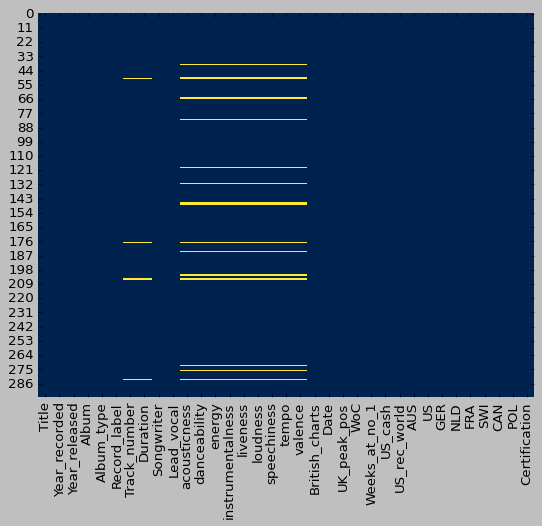

In [131]:
# Display the heatmap (missing values) of the songs dataset 
# (demonstrate using sb.heatmap() vs. sb.heatmap();)

# sb.heatmap(songs.isna(), cbar=False, cmap='viridis')
sb.heatmap(songs.isna(), cbar=False, cmap='cividis');

How many missing values are there? (`<pd.df>.isna().sum()` for all columns, `<pd.df>.['<column>'].isna().sum()` for a specific column, `<pd.df>.[['<column1>', 'column2', ...]].isna().sum()` for selected multiple columns; `isnull()` is the same as `isna()`, and `isna()` is used more often).

In [132]:
songs.isna().sum()

Title                0
Year_recorded        0
Year_released        0
Album                0
Album_type           0
Record_label         0
Track_number         4
Duration             4
Songwriter           0
Lead_vocal           0
acousticness        16
danceability        16
energy              16
instrumentalness    16
liveness            16
loudness            16
speechiness         16
tempo               16
valence             16
British_charts       0
Date                 0
UK_peak_pos          0
WoC                  0
Weeks_at_no_1        0
US_cash              0
US_rec_world         0
AUS                  0
US                   0
GER                  0
NLD                  0
FRA                  0
SWI                  0
CAN                  0
POL                  0
Certification        0
dtype: int64

### Examining individual data items, rows and columns
- `<pd.df>.sample()`
- Simple indexing and fancy indexing: `<pd.df>.iloc[]`, `<pd.df>.loc[]`
- `<pd.df>.index`, `<pd.df>.index[<from>:<to>]`, `<pd.df>.reset_index(drop=True, inplace=True)`
- Indexing using list of values: `<pd.df>.loc[<pd.df>.<column>.isin(<list of values>)]` (select those observations where the value of <column> is in the `<list of values>`)
- Indexing in data stats: `<pd.df>.describe().loc['50%', '<column_name>']` (select the median of `<column_name>` from the `<pd.df>` stats computed by `describe()`)

Take a sample of the dataset to get a feeling of what's in there.

In [56]:
songs.sample(10)

,Title,Year_recorded,Year_released,Album,Album_type,Record_label,Track_number,Duration,Songwriter,Lead_vocal,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,British_charts,Date,UK_peak_pos,WoC,Weeks_at_no_1,US_cash,US_rec_world,AUS,US,GER,NLD,FRA,SWI,CAN,POL,Certification
244,"Surprise, Surprise",1964,1965,"The Rolling Stones, Now!",Studio,ABKCO Records,12.0,2:31,Jagger/Richards,Jagger,0.0300,0.750,0.882,0.000005,0.1090,-8.842,0.0762,107.690,0.939,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
131,It's Only Rock 'N Roll (But I Like It),1973,1974,Love You Live,Live,Virgin,5.0,4:29,Jagger/Richards,Jagger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,-,-,-,-,18,11,-,16,36,17,3,-,12,-,-
175,My Girl,1965,1967,Flowers,Compilation,ABKCO Records,6.0,2:39,Smokey Robinson/Ronald White,Jagger,0.6790,0.589,0.567,0.175000,0.3350,-7.774,0.0342,110.531,0.731,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
242,Suck On The Jugular,1993,1994,Voodoo Lounge,Studio,Virgin,11.0,4:27,Jagger/Richards,Jagger,0.0974,0.477,0.896,0.052600,0.0521,-5.999,0.0644,102.591,0.726,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
187,One Hit (To The Body),1985,1986,Dirty Work,Studio,Virgin,1.0,4:44,Jagger/Richards,Jagger,0.1470,0.587,0.965,0.000048,0.6200,-3.719,0.1050,138.312,0.637,Yes,31.05. 1986,80,02,00,-,-,34,28,-,50,-,-,26,-,-
1,100 Years Ago,1972,1973,Goats Head Soup,Studio,Interscope / Polydor,2.0,3:58,Jagger/Richards,Jagger,0.9350,0.554,0.413,0.000994,0.1450,-7.800,0.0276,105.219,0.414,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
243,Summer Romance,1979,1980,Emotional Rescue,Studio,Universal,2.0,3:16,Jagger/Richards,Jagger,0.0730,0.334,0.975,0.269000,0.2910,-3.134,0.1880,170.035,0.620,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
169,Mixed Emotions,1989,1989,Steel Wheels,Studio,Virgin,2.0,4:38,Jagger/Richards,Jagger,0.0995,0.493,0.956,0.000295,0.8300,-4.257,0.0429,137.091,0.831,Yes,02.09. 1989,36,05,00,-,-,25,5,20,9,41,24,1,39,-
162,Melody,1975,1976,Black and Blue,Studio,Virgin,6.0,5:50,Jagger/Richards,Jagger,0.6320,0.657,0.517,0.001390,0.2410,-7.250,0.0417,81.915,0.574,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
186,On With The Show,1967,1967,Their Satanic Majesties Request,Studio,ABKCO Records,10.0,3:39,Jagger/Richards,Jagger,0.6710,0.532,0.858,0.000007,0.4880,-11.190,0.2230,114.351,0.590,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


What are the songs that have *some* missing values? 
Use, e.g., `songs.isna.sum()` and show the type of the result.

In [133]:
display(songs.isna().sum())
display(type(songs.isna().sum()))           # pd.Series

Title                0
Year_recorded        0
Year_released        0
Album                0
Album_type           0
Record_label         0
Track_number         4
Duration             4
Songwriter           0
Lead_vocal           0
acousticness        16
danceability        16
energy              16
instrumentalness    16
liveness            16
loudness            16
speechiness         16
tempo               16
valence             16
British_charts       0
Date                 0
UK_peak_pos          0
WoC                  0
Weeks_at_no_1        0
US_cash              0
US_rec_world         0
AUS                  0
US                   0
GER                  0
NLD                  0
FRA                  0
SWI                  0
CAN                  0
POL                  0
Certification        0
dtype: int64

pandas.core.series.Series

From the `pd.Series` object retrieved in the previous step, select the elements that have the values > 0 (i.e., the names of the columns that have some `NaN` values).
Use masking to create the index of such elements.

In [134]:
i = songs.isna().sum() > 0
display(i)
display(type(i))                            # pd.Series

display(songs.isna().sum().index)
display(songs.isna().sum().index[i])
# display(songs.isna().sum().values)
# display(type(songs.isna().sum().values))

Title               False
Year_recorded       False
Year_released       False
Album               False
Album_type          False
Record_label        False
Track_number         True
Duration             True
Songwriter          False
Lead_vocal          False
acousticness         True
danceability         True
energy               True
instrumentalness     True
liveness             True
loudness             True
speechiness          True
tempo                True
valence              True
British_charts      False
Date                False
UK_peak_pos         False
WoC                 False
Weeks_at_no_1       False
US_cash             False
US_rec_world        False
AUS                 False
US                  False
GER                 False
NLD                 False
FRA                 False
SWI                 False
CAN                 False
POL                 False
Certification       False
dtype: bool

pandas.core.series.Series

Index(['Title', 'Year_recorded', 'Year_released', 'Album', 'Album_type',
       'Record_label', 'Track_number', 'Duration', 'Songwriter', 'Lead_vocal',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'British_charts', 'Date', 'UK_peak_pos', 'WoC', 'Weeks_at_no_1',
       'US_cash', 'US_rec_world', 'AUS', 'US', 'GER', 'NLD', 'FRA', 'SWI',
       'CAN', 'POL', 'Certification'],
      dtype='object')

Index(['Track_number', 'Duration', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

How many `NaN`s are there in each column that has `NaN`s?

In [135]:
columns_with_NaNs = songs.isna().sum()[i]
columns_with_NaNs

Track_number         4
Duration             4
acousticness        16
danceability        16
energy              16
instrumentalness    16
liveness            16
loudness            16
speechiness         16
tempo               16
valence             16
dtype: int64

What are the songs with missing `Duration` values?

Using `isna()`, `loc[]`, `iloc[]`, `len()` and `index`.

Calling `loc[]` effectively means *creating a subset* (typically based on a relational or logical expression over one or more columns of the dataset). In other words, `loc[]` creates a *slice* of the dataframe, so the type of the result is `<pd.df>`.

Note that `loc[]` works as `loc[<selected rows>, <selected columns>]`. The indices `<selected rows>` and `<selected columns>` can be created either directly in `loc[]` or beforehand.

If defining the `<selected rows>` index to be used with `loc[]` subsequently, it is a good practice to define it as a boolean *mask* over a single column, like `<pd.df>['<column>'].isna()`, or as a logical expression in which each chunk is a relational expression over a single column, e.g. `<pd.df>['<column1>'].isna() & <pd.df>['<column2>'] < 23`. The result will be a subset of the original dataframe (i.e., another `<pd.df>`).

Defining the relevant index with a statement like `<pd.df>.loc[<pd.df>['<column>'].isna()].index` is a good starting point when using `iloc[]` subsequently.

If using `iloc[]`, don't forget the `.index` chunk in the statement used to create the index (such as `<pd.df>.loc[<pd.df>['<column>'].isna()].index`). Without it, the result is another `<pd.df>`.

In [171]:
# Define i_iloc, the index to be used with iloc[]
# iloc[] can be used conveniently here if the relevant index is already defined with <pd.df>.loc[<pd.df>['<column>'].isna()].index;
# remember that the second index in iloc[] must be a number too (the relevant column index)
i = songs.Duration.isna() > 0
i_iloc = songs.loc[i].index
display(i_iloc)
display(songs.iloc[i_iloc, [0, 3, 7]])

# Define i_loc, the index (boolean mask) to be used with loc[]
i_loc = songs.Duration.isna() > 0
display(songs.loc[i_loc, ['Title', 'Album', 'Duration']])

# display(songs.loc[i_loc.index, ['Title', 'Album']])
# display(songs.iloc[i_iloc, [0, 2]])

Int64Index([50, 177, 205, 283], dtype='int64')

,Title,Album,Duration
50,Corinna,No Security,NaN
177,The Nearness Of You,Live Licks,NaN
205,Rock Me Baby,Live Licks,NaN
283,Who's Been Sleeping Here,Between the Buttons,NaN


,Title,Album,Duration
50,Corinna,No Security,NaN
177,The Nearness Of You,Live Licks,NaN
205,Rock Me Baby,Live Licks,NaN
283,Who's Been Sleeping Here,Between the Buttons,NaN


Replace `NaN` values in `Duration` with 'No' (these songs have not appeared on any of the official albums).

In [172]:
# Make the replacement and display it
# songs.Duration
songs.loc[i_loc, 'Duration'] = 'No'
songs.loc[i_loc, ['Title', 'Album', 'Duration']]
# songs.Duration

,Title,Album,Duration
50,Corinna,No Security,No
177,The Nearness Of You,Live Licks,No
205,Rock Me Baby,Live Licks,No
283,Who's Been Sleeping Here,Between the Buttons,No


Double-check the missing values now:

In [142]:
# Use <pd.df>.isna().sum() or sb.heatmap(<pd.df>.isna(), cmap='...')
songs.Duration.isna().sum()

0

How many songs from The Rolling Stones early years are there?

In [102]:
# Define early years using a list comprehension
early_years = [y for y in songs.Year_released if 1962 <= y <= 1967]
# Display the songs from the early years using a combination of <pd.df>.loc[] and isin()
songs.loc[songs.Year_released.isin(early_years), ['Title', 'Year_released']]

,Title,Year_released
0,19th Nervous Breakdown,1966
2,2000 Light Years From Home,1967
3,2000 Man,1967
4,2120 South Michigan Avenue,1964
9,All Sold Out,1967
...,...,...
280,What A Shame,1965
283,Who's Been Sleeping Here,1967
289,Yesterday's Papers,1967
290,You Better Move On,1964


### Grouping and sorting data
- `<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`
- `<pd.df>.<column>.groupby()`, `<pd.df>.groupby('<column>')`, `<pd.df>.groupby('<column>').get_group(<value>)`
- `<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts().sort_index()`, `<pd.df>['<column>'].value_counts().sort_index(inplace=True)`
- `<pd.df>.sort_values(by='<column name>', ascending=False/True)`
- `<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`)
- `<pd.df>.groupby('<column>').<another column>.agg(['<f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`,...)

If `sort_values()` is used after `agg([<'f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.


How many unique values for `Year_released` are there in the dataset (`<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`)?

In [165]:
songs.Year_released.nunique()

30

Group the songs in the dataset by the year of release (`<pd.df>.<column>.groupby()`, `<pd.df>.groupby('<column>')`, `<pd.df>.groupby('<column>').get_group(<value>)`). The result can be `songs_by_year`. Display it, show its type, and explore its individual groups and their types.

In [166]:
songs_by_year = songs.groupby('Year_released')
display(songs_by_year)
display(type(songs_by_year))
display(songs_by_year.get_group(1965))
display(type(songs_by_year.get_group(1965)))

pandas.core.groupby.generic.DataFrameGroupBy

,Title,Year_recorded,Year_released,Album,Album_type,Record_label,Track_number,Duration,Songwriter,Lead_vocal,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,British_charts,Date,UK_peak_pos,WoC,Weeks_at_no_1,US_cash,US_rec_world,AUS,US,GER,NLD,FRA,SWI,CAN,POL,Certification
17,As Tears Go By,1965,1965,December's Children (And Everybody's),Studio,ABKCO Records,9.0,2:46,Jagger/Richards/Loog Oldham,Jagger,0.734000,0.375,0.290,0.001690,0.1850,-10.889,0.0293,113.163,0.3440,Yes,-,-,-,-,3,6,-,6,8,-,22,-,1,-,-
30,Blue Turns To Grey,1965,1965,December's Children (And Everybody's),Studio,ABKCO Records,11.0,2:29,Jagger/Richards,Jagger,0.177000,0.584,0.678,0.004830,0.1380,-7.665,0.0292,112.703,0.7730,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
54,Cry To Me,1965,1965,Out of Our Heads,Studio,ABKCO Records,8.0,3:09,Bert Berns,Jagger,0.125000,0.348,0.641,0.189000,0.1700,-10.159,0.0406,182.276,0.5220,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
63,Down Home Girl,1964,1965,"The Rolling Stones, Now!",Studio,ABKCO Records,2.0,4:13,Jerry Leiber/Artie Butler,Jagger,0.672000,0.675,0.782,0.692000,0.0825,-8.204,0.0276,115.855,0.8350,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
65,Down The Road A Piece,1964,1965,"The Rolling Stones, Now!",Studio,ABKCO Records,7.0,2:56,Don Raye,Jagger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
70,Everybody Needs Somebody To Love,1964,1965,"The Rolling Stones, Now!",Studio,ABKCO Records,1.0,3:00,Jerry Wexler/Bert Berns/Solomon Burke,Jagger,0.273000,0.531,0.744,0.003180,0.1280,-7.580,0.0700,177.862,0.7780,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
80,Get Off Of My Cloud,1965,1965,Got Live If You Want It!,Live,ABKCO Records / Universal,2.0,2:54,Jagger/Richards,Jagger,0.032100,0.578,0.879,0.675000,0.0617,-8.676,0.0565,126.116,0.8710,Yes,03.11. 1965,01,12,03,1,2,-,1,1,3,7,-,1,-,-
84,Good Times,1965,1965,Out of Our Heads,Studio,ABKCO Records,5.0,1:59,Sam Cooke,Jagger,0.073600,0.663,0.551,0.001360,0.2070,-10.317,0.0391,126.251,0.7480,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
86,Gotta Get Away,1965,1965,December's Children (And Everybody's),Studio,ABKCO Records,10.0,2:07,Jagger/Richards,Jagger,0.069300,0.666,0.550,0.574000,0.1420,-8.296,0.0326,112.947,0.6990,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
103,Hitch Hike,1965,1965,Out of Our Heads,Studio,ABKCO Records,2.0,2:26,"Marvin Gaye/William ""Mickey"" Stevenson/Clarenc...",Jagger,0.340000,0.747,0.835,0.733000,0.0281,-7.040,0.0324,123.456,0.9630,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


pandas.core.frame.DataFrame

How many songs are there in the dataset for each `Year_released` (`<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts()[<year>]`, `<pd.df>['<column>'].value_counts().sort_index()`)?

Note that `value_counts()` returns a `pd.Series` object, with the index equal to `<pd.df>['<column>'].unique()` values.

In [167]:
songs.Year_released.value_counts()

1965    30
1967    25
1966    18
1964    18
1972    18
1994    15
2005    15
1997    13
2016    12
1989    12
1986    11
1981    11
1971    10
1973    10
1978    10
1983    10
1980    10
1974    10
1969     9
1968     9
1976     6
1977     2
1982     2
1975     2
1991     2
1995     2
2004     2
2008     1
1998     1
1970     1
Name: Year_released, dtype: int64

Sort the songs from the dataset by the year of release (`<pd.df>.sort_values(by='<column name>', ascending=False/True)`).
(It is also possible to use `inplace=True` in `sort_values()`, but it will change the order of songs in the dataset from that point on.)

In [168]:
songs.sort_values('Year_released', )                # ascending=True is the default

,Title,Year_recorded,Year_released,Album,Album_type,Record_label,Track_number,Duration,Songwriter,Lead_vocal,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,British_charts,Date,UK_peak_pos,WoC,Weeks_at_no_1,US_cash,US_rec_world,AUS,US,GER,NLD,FRA,SWI,CAN,POL,Certification
129,It's All Over Now,1964,1964,12 X 5,Studio,ABKCO Records,6.0,3:27,Bobby Womack/Shirley Womack,Jagger,0.029600,0.600000,0.702000,0.000005,0.3290,-10.560000,0.031100,99.143000,0.716000,Yes,08.07. 1964,01,15,01,25,33,-,26,14,1,7,-,26,-,-
245,Susie Q,1964,1964,The Rolling Stones No.2,Studio,Decca,12.0,1:50,Dale Hawkins/Stan Lewis/Eleanore Broadwater,Jagger,0.035400,0.502000,0.752000,0.638000,0.1580,-9.028000,0.037200,81.103000,0.968000,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
170,Mona (I Need You Baby),1964,1964,"The Rolling Stones, Now!",Studio,ABKCO Records,6.0,3:35,Bo Diddley,Jagger,0.070067,0.694333,0.662667,0.000246,0.0942,-10.677333,0.127667,98.931667,0.421333,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
16,Around And Around,1964,1964,Love You Live,Live,Virgin,4.0,3:52,Chuck Berry,Jagger,0.448000,0.312000,0.617000,0.000097,0.2740,-11.783000,0.067200,183.436000,0.789000,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
85,"Good Times, Bad Times",1964,1964,12 X 5,Studio,ABKCO Records,5.0,2:31,Jagger/Richards,Jagger,0.067200,0.677000,0.512000,0.006910,0.0945,-9.561000,0.028600,98.888000,0.668000,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Ride 'Em On Down,2015,2016,Blue & Lonesome,Studio,Interscope / Polydor,7.0,2:48,Eddie Taylor,Jagger,0.140000,0.508000,0.949000,0.014900,0.3760,-4.203000,0.086600,116.004000,0.726000,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
94,Hate To See You Go,2015,2016,Blue & Lonesome,Studio,Interscope / Polydor,8.0,3:20,Little Walter,Jagger,0.399000,0.418000,0.828000,0.669000,0.1460,-5.173000,0.122000,184.436000,0.376000,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
149,Little Rain,2015,2016,Blue & Lonesome,Studio,Interscope / Polydor,10.0,3:32,Ewart G.Abner Jr./Jimmy Reed,Jagger,0.844000,0.432000,0.384000,0.047100,0.1020,-6.894000,0.027900,94.380000,0.168000,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
112,I Can't Quit You Baby,2015,2016,Blue & Lonesome,Studio,Interscope / Polydor,12.0,5:13,Willie Dixon,Jagger,0.226000,0.328000,0.711000,0.017200,0.0669,-5.037000,0.045500,182.500000,0.170000,Yes,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


Group the songs in the dataset by the year of release and display `mean` and/or `max` duration of the songs in each year, as well as the number (`count`) of songs in each year (`<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`), `<pd.df>.groupby('<column>').<another column>.agg(['f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`, `max()`,...)).
If `sort_values()` is used after `agg([<'f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.

In [173]:
# To make all strings in songs.Duration look alike, insert placeholder values for those that are now 'No'
i = songs.Duration == 'No'
songs.loc[i, 'Duration'] = '0:16'
display(songs.loc[songs.Duration == '0:16', ['Title', 'Duration']])
songs.Duration

,Title,Duration
50,Corinna,0:16
177,The Nearness Of You,0:16
205,Rock Me Baby,0:16
283,Who's Been Sleeping Here,0:16


0      3:31
1      3:58
2      4:45
3      3:07
4      3:39
       ... 
292    3:40
293    3:43
294    3:28
295    2:50
296    2:33
Name: Duration, Length: 297, dtype: object

In [174]:
# Convert Duration to int

# songs.Duration
# songs.Duration[:10]
# songs[:10]

# duration = songs.Duration.copy()
# duration[:10]
# print(duration[0].split(':'))

duration = songs.Duration.copy()
for i in range(len(duration)):
    duration[i] = int(duration[i].split(':')[0]) * 60 + int(duration[i].split(':')[1])
print(duration[:10])
songs.Duration = duration
print(songs.Duration[:10])
songs.Duration.isna().sum()

# m, s = '0:13'.split(':')
# print(m, s)

0    211
1    238
2    285
3    187
4    219
5    210
6    257
7    230
8    286
9    138
Name: Duration, dtype: object
0    211
1    238
2    285
3    187
4    219
5    210
6    257
7    230
8    286
9    138
Name: Duration, dtype: object


0

In [185]:
# Make the groupings and aggregations

# songs.groupby('Year_released').energy.mean().sort_values(ascending=True)
# songs.groupby('Year_released').energy.count().sort_values(ascending=True)
# songs.groupby('Year_released').energy.agg(['count', 'mean', 'max']).sort_values(by='count', ascending=True)

songs.groupby('Year_released').Duration.mean().sort_values(ascending=True)
songs.groupby('Year_released').Duration.count().sort_values(ascending=True)
songs.groupby('Year_released').Duration.agg(['count', 'mean', 'max']).sort_values(by='count', ascending=True)

# display(songs.loc[songs.Duration == 16, ['Title', 'Duration', 'Year_released']])


,count,mean,max
Year_released,,,
1998,1,16.000000,16
1970,1,273.000000,273
2008,1,358.000000,358
2004,2,16.000000,16
1995,2,289.000000,338
1982,2,154.500000,201
1991,2,276.500000,286
1975,2,283.500000,299
1977,2,364.000000,384


## Data visualization
Plot some scatterplots, line plots, bar graphs, histograms, scatterplots, box plots, violins, heatmaps,...
[Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

[Matplotlib examples](https://matplotlib.org/stable/gallery/index.html)
[Seaborn examples](https://seaborn.pydata.org/examples/index.html) (see also [The Python Graph Gallery](https://www.python-graph-gallery.com/); it has a very neat user interface!)
[Plotnine examples](https://plotnine.readthedocs.io/en/stable/api.html) (click on any element for its API and examples)

<u>**Note that it is also possible to**</u> <u>**[plot lines, bargraphs,... with Pandas only](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html)**</u> (although in such cases Pandas interacts with Matplotlib under the surface).

##### Scatterplot

Read a slightly different dataset.

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [2]:
# Get the songs as a pd.DataFrame object from 'data/The Rolling Stones songs dataset, v2.csv', or from
# '../data/The Rolling Stones songs dataset, v2.csv', or '../../data/The Rolling Stones dataset, v2.csv', or ...,
# depending on where the csv file is located


Check for missing values (use, e.g., `sb.heatmap(<pd.df>.isna(), cbar=False, cmap='viridis')`).

Scatterplot the relationship between `Duration` and `Other.releases`.

To set the ranges of values on x-axis and y-axis (`Duration`, `Other.releases`), check the max values or run `describe()`.

###### 1. Matplotlib version

[Matplotlib scatterplot example](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html)

Use the following syntax:
`ax = plt.axes()`
`ax.set(xlim=(<from>, <to>), ylim=(<from>, <to>), xlabel='<xlabel>', ylabel='<ylabel>', title='<title>')`
`ax.scatter(<pd.df>['<X>'], <pd.df>['<Y>'], marker='<marker type>', c='<color>', edgecolors='<edgecolor>', s=<marker size>);`
The color parameter (`c`) is optional; if present, it should be a scalar or a sequence of length consistent with the lengths of `<X>` and `<Y>` (`(<X>, <Y>)` points). The `marker` parameter is optional as well. Both `c` and `marker` have defaults. For other values of `c` and `marker`, see [this](https://matplotlib.org/stable/gallery/color/named_colors.html) and [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle), respectively. A good value for `s` is 30-40 for 200-300 markers on the plot.

Alternatively:
`ax.plot(<pd.df>['<X>'], <pd.df>['<Y>'], marker='<marker type>', color='<color>', linestyle='');`
The `linestyle=''` parameter is essential for plotting the dots only - omitting it means that the connecting lines are plotted as well.

###### 2. Plotnine version
[Plotnine scatterplot example](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_point.html#plotnine.geoms.geom_point)

In *Plotnine*, the syntax for setting the ranges on x and y axes is `xlim(<from>, <to>)`, `ylim(<from>, <to>)`.

If `<x>` and `<y>` values are not in a dataframe columns (`<X>` and `<Y>`) already, create a minimal dataframe to support plotting (`<df> = pd.DataFrame({'<X>': <x>, '<Y>': <y>})`).

Use `ggplot` as:

`(`
&emsp;&emsp;`ggplot(<df>, aes(x='<X>', y='<Y>) +`
&emsp;&emsp;`geom_point(color='<color>', fill='<fill color>', shape='<shape>', size=<size>) +`
&emsp;&emsp;`labs(x='...', y='...', title='...') ).draw();`

The `color`, `fill` and `shape` parameters have defaults. The other values of these parameters are the same as in Matplotlib (see [this](https://matplotlib.org/stable/gallery/color/named_colors.html) and [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle), respectively).

**Note:** `aes(x='<X>', y='<Y>)` shows compiler errors but works anyway; `aes('<X>', '<Y>)` does not show any compiler error. However, `labs(x='...', y='...', title='...')` shows compiler errors regardless of `x=...`, `y=...`, ..., but works only *with* `x=...`, `y=...`, ...

###### 3. A brief analysis of the plot: What are the shortest/longest songs and their durations?

In [ ]:
# display(<pd.df>['column'] <= <value>)                                    # Boolean mask
# display(type(<pd.df>['column'] <= <value>))                              # pd.Series
# display(<pd.df>[<pd.df>['column'] <= <value>]['column to to display'])   # select one column
# display(<pd.df>[<pd.df>['column'] <= <value>]['column 1  to to display', 'column 2 to display',...])   # select multiple columns

# Try this also with .loc[], as well as with an explicitly set index and with .index


##### Line plot

How many songs from 1964 are there?

In [ ]:
# Use <pd.df>['<column>'].value_counts(), <pd.df>['<column>'].value_counts()[<specific value> in <column>]


Sort this result by index: `pd.Series.sort_index()` (there is also `pd.DataFrame.sort_index()`).

In [ ]:
# Define val_counts_sorted_by_index


Preparation for plotting (`counts` on y-axis, `year` on x-axis): get the `np.ndarray` version of `val_counts_sorted_by_index`, as well as of its index.

One way of doing it is to use `np.array()` over `val_counts_sorted_by_index.index` and `val_counts_sorted_by_index.values`. However, the same effect is achieved using only `val_counts_sorted_by_index.index` and `val_counts_sorted_by_index.values` (their type is `np.ndarray`).

And now plot it.

###### 1. Matplotlib version
[Matplotlib line plot example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/simple_plot.html)

`ax = plt.axes()`
`ax.set(xlim=(<lower limit>, <upper limit>), ylim=(<lower limit>, <upper limit>), xlabel='...', ylabel='...', title='...')`
`ax.plot(<x>, <y>, color='...', marker='<marker type>', linewidth=<number>, alpha=<number>)`

Do not use `x=<x>, y=<y>` in `ax.plot()`, it generates an error. Use just `<x>, <y>`. For the other parameters, the keywords are necessary.

Examples of parameters in `ax.plot()`: `color='steelblue'`, `linewidth=3`, `alpha=0.8` (alpha: transparency (0-1)).

###### 2. Plotnine version
[Plotnine line plot example](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_line.html#plotnine.geoms.geom_line)
[Excellent tutorial on plotnine](https://realpython.com/ggplot-python/)

For some reasons, running the Matplotlib version immediately before running the Plotnine version sometimes resets all values in `year` to 1970 (!!!), so re-creating `year` here might be necessary.

In [ ]:
# year = np.array(val_counts_sorted_by_index.index)
# display(year)


If `<x>` and `<y>` values are not in a dataframe columns (`<X>` and `<Y>`) already, create a minimal dataframe to support plotting (`<df> = pd.DataFrame({'<X>': <x>, '<Y>': <y>})`).

Use `ggplot` as:

`(`
&emsp;&emsp;`ggplot(<df>, aes(<x> = '<X>', <y> = '<Y>) +`
&emsp;&emsp;`geom_line(color='<color>', size=<size>, alpha=<transparency, 0-1>, linetype='<linetype>') +`
&emsp;&emsp;`labs(x='...', y='...')`
`).draw();`

Examples of parameters in `geom_line()`: `color='steelblue'`, `size=1`, `linetype='solid'`, `alpha=0.8` (alpha: transparency (0-1)).


###### 3. Smoothen the curves
Based on [this](https://stackoverflow.com/a/5284038/1899061).
`from scipy.interpolate import make_interp_spline, BSpline`

`<x> = <definition of x-axis variable>`
`<y> = <definition of y-axis variable>`

`<x_smooth> = np.linspace(<x>.min(), <x>max(), 300)`&emsp;&emsp;&emsp;&emsp;# 300: the number of points to make between `<x>.min() and <x>.max()`
`spl = make_interp_spline(year, counts, k=3)`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; # type: BSpline
`<y_smooth> = spl(<x>_smooth)`

`plt.xlim([<lowest value of x to show on the plot>, <highest value of x to show on the plot>])`
`plt.ylim([<lowest value of y to show on the plot>, <highest value of x to show on the plot>])`

`plt.plot(<x_smooth>, <y_smooth>)`
`plt.plot(<x>, <y>)`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;# optional: show the segmented line on the same plot as well
`plt.show()`



In [ ]:
# # 300 represents the number of points to make between T.min and T.max
# T = np.array([6, 7, 8, 9, 10, 11, 12])
# power = np.array([1.53E+03, 5.92E+02, 2.04E+02, 7.24E+01, 2.72E+01, 1.10E+01, 4.70E+00])
#
# # plt.plot(T,power)
# # plt.show()
#
# xnew = np.linspace(T.min(), T.max(), 300)
#
# spl = make_interp_spline(T, power, k=3)  # type: BSpline
# power_smooth = spl(xnew)
#
# plt.plot(xnew, power_smooth)
# plt.show()

# from scipy.interpolate import make_interp_spline, BSpline
#
# year_smooth = np.linspace(year.min(), year.max(), 300)
# spl = make_interp_spline(year, counts, k=3)  # type: BSpline
# counts_smooth = spl(year_smooth)
#
# plt.xlim([1961, 1980])
# plt.ylim([0, 70])
#
# plt.plot(year_smooth, counts_smooth)
# plt.plot(year, counts)
# plt.show()
#
# # Alternatively
# ax = plt.axes()
# ax.set(xlim=(years.min(), years.max()), ylim=(0, 70), xlabel='year', ylabel='count', title='Song counts over years')
# ax.plot(years, counts, color='steelblue', linewidth=2, marker='o', alpha=0.8)
# ax.plot(year_smooth, counts_smooth, color='steelblue', linewidth=3, alpha=0.8);

###### 4. Multiple subplots
(shown here after [this](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html))

In [ ]:
# # From https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
# fig = plt.figure()
# ax1 = fig.add_axes([0.1, 0.55, 0.8, 0.4],
#                    xticklabels=[], ylim=(-1.2, 1.2))
# ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
#                    ylim=(-1.2, 1.2))
# # Meanings of the numbers in [0.1, 0.55, 0.8, 0.4]:
# #     0.1 - distance from the left edge of fig (grey area)
# #     0.55 - distance between the upper and lower subplots (0.5: they touch each other)
# #     0.8 - distance from the right edge of fig (grey area)
# #     0.4 - area assigned to the upper/lower subplot (ax1/ax2) along the vertical axes
# # Experiment with these numbers to get a better feeling for them

# x = np.linspace(0, 10)
# ax1.plot(np.sin(x))
# ax2.plot(np.cos(x));

# fig, ax = plt.subplots()
# ax


# fig = plt.figure()
# # fig
# ax1 = fig.add_axes([0.1, 0.65, 0.8, 0.4],
#                    xlim=(1961, 1980), ylim=(0, 70),
#                    xlabel='year', ylabel='counts',
#                    title='Number of songs recorded over the years')
# ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
#                    xlim=(1961, 1970), ylim=(0, 70),
#                    xlabel='year', ylabel='counts',
#                    title='Number of songs recorded over the years')
# # display(type(ax1))
#
# ax1.plot(year, counts, color='steelblue', linewidth=3, alpha=0.8)    # alpha: transparency (0-1)
# ax2.plot(year, counts, color='purple', linewidth=3, alpha=0.8);    # alpha: transparency (0-1)

##### Histogram

Use Pandas to extract song lengths as a `pd.Series` object (`<pd.Series object> = <pd.df>['<column>']`).

In [ ]:
# Get the song lengths as a pd.Series object


In [ ]:
# Convert the song lengths into a NumPy array (using <song lengths>.values or np.array(<song lengths>))


###### 1. Matplotlib version
[Matplotlib histogram example](https://matplotlib.org/stable/gallery/statistics/hist.html)

Plot the histogram of the song lengths using Matplotlib.

Minimal version: `plt.hist(<x>, <number of bins>);`

Alternatively:
`ax = plt.axes()`
`ax.set(xlabel='...', ylabel='...', title='...')`
`ax.hist(<x>, <number of bins>)`

As for the plot styles, there are a lot of [available styles](https://www.dunderdata.com/blog/view-all-available-matplotlib-styles) that can be also shown in code using `plt.style.available`. See also [this](https://www.analyticsvidhya.com/blog/2021/08/exploring-matplotlib-stylesheets-for-data-visualization/).

Alternatively, plot style can be set using `sb.set_theme()` (or just `sb.set()`, but that function might get deprecated and removed from *Seaborn* in the future). See [`sb_set_theme()` documentation](https://seaborn.pydata.org/generated/seaborn.set_theme.html) for the function's parameters and defaults.

In [ ]:
# Set plot style using sb.set_theme()

# Plot the histogram - x: song time in [sec]; y: number of songs; 40 bins

# Minimal version

# A more detailed version


###### 2. Plotnine version
[Plotnine histogram example](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_histogram.html#plotnine.geoms.geom_histogram)

Plot the histogram of the song lengths using *Plotnine*.

A minimal, but effective version:
`plot = ggplot(songs, aes(x='<x>'))`
`plot + geom_histogram(bins=40)`

A more detailed version:
`(`
&emsp;&emsp;`ggplot(songs, aes(x='<x>')) +`
&emsp;&emsp;`geom_histogram(bins=40, color='<color>', fill='<fill>', size='<outline thickness>', alpha=<transparency, 0-1>) +`
&emsp;&emsp;`labs(x='<x>', y='count', title='<title>')`
`).draw();`

[Excellent tutorial on plotnine](https://realpython.com/ggplot-python/).

In [ ]:
# plot = ggplot(songs, aes(x='Duration'))
# plot + geom_histogram(bins=40)


To avoid the annoying text output like `<ggplot: (177159008578)>` under the plot, use the following syntax:

`(`
&emsp;&emsp;`ggplot(songs, aes(x='<x>')) +`
&emsp;&emsp;`geom_histogram(bins=40, color='<color>', fill='<fill>', size='<outline thickness>', alpha=<transparency, 0-1>) +`
&emsp;&emsp;`labs(x='<x>', y='count', title='<title>')`
`).draw();`

##### Bar graph

How many Rolling Stones songs have reached Billboard Top 50?

Read the dataset (`'../data/The Rolling Stones songs dataset, v2.csv'`) and make some minor transformations.

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [ ]:
# Get the songs as a pd.DataFrame object from 'data/The Rolling Stones songs dataset, v1.csv', or from
# '../data/The Rolling Stones songs dataset, v1.csv', or '../../data/The Rolling Stones songs dataset, v1.csv', or ..., # depending on where the csv file is located


Add another column, `Top50`: a song has reached Billboard Top 50 chart (`Yes`), or it hasn't (`No`).

Create the index of the songs that HAVE reached Billboard Top 50: `i = songs.loc[songs['Top.50.Billboard'] != -1].index` or `i = np.array(songs.loc[songs['Top.50.Billboard'] != -1].index)`.

Change the values of `Top50` corresponding to the created index to `Yes`.

Check if the newly added `Top50` column is now OK. Try this using the index created in the previous step, as well as using `i = songs.loc[songs['Top.50.Billboard'] != -1].index` directly.

<u>Save this version as a new *.csv* file, for use in the subsequent examples.</u> (`<pd.df>.to_csv('<path>')`)

###### Preparing the data for plotting the bar graph

Group the data - group the songs by the year of release.

Use `get_group(<year>)` to get all songs for a selected year and `value_counts()` over the resulting group's `Top50` column (showing the `Yes` and `No` subgroups). This is a precursor to creating the data for the y-axis of the bar graph.

Build the data to plot by extracting relevant items from each group.

For x-axis, use `unique()` over the `Year` column and then `np.sort()` the results.

For y-axis, create the lists of the numbers of the songs that have reached Billboard Top 50 (`in_top50`) and of those that haven't (`not_in_top50`).
(Start from two empty lists. Loop over the sorted list of years created in the previous step, `get_group()` for each year and append the `value_counts()['Yes']` of the `Top50` column of the current year (`y['Top.50']`) to `in_top50` if any of `y['Top.50']` has the value `Yes`, otherwise append 0. Do the similar thing for `not_in_top50`. Display both lists in the end to double-check the result.)

And now plot the bar graph. Based on the second example from [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) (using `<pd.df>.plot.bar()`, not Matplotlib or Seaborn).
For a complete list of parameters used in `**kwargs`, see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).
For a list of named colors (Matplotlib named colors), see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors).

First create an auxiliary dataframe to use for plotting. Use `in_top50` and `not_in_top50` as the columns, <u>and the sorted list of years created above as the index of the dataframe</u>.

In [ ]:
# # The role-model example from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
# speed = [0.1, 17.5, 40, 48, 52, 69, 88]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']
# df = pd.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)


[Pandas bargraph example](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

Use `ax = <pd.df>.plot.bar()` to plot the bargraph.

Relevant parameters:
- `rot=<rotation angle [degrees]>` for the x-axis labels
- `ylim=(<from>, <to>)`
- `color={'In Top 50': 'limegreen', 'Not in Top 50': 'navajowhite'}` (for a list of Matplotlib named colors, see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors))
- `edgecolor='<color of bin lines>'`
- `title='<title>'`
- `xlabel='<xlabel>'`
- `ylabel='<ylabel>'`
- `fontsize=<fontsize>` (for all text; suitable fontsizes are 10, 12,...)
- `stacked=True` (the bins for the same x-axis value stacked on top of one another)

The returned value (`ax`) is usually unnecessary and can be omitted.

##### Box plot
[Seaborn boxplot example](https://seaborn.pydata.org/generated/seaborn.boxplot.html) (used here as the role model)

For Seaborn color palette names see [this](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) or [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/). To list the names of some ('quantitative') Seaborn color palettes, use `sns.palettes.SEABORN_PALETTES.keys()` (see [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/) and [this](https://www.codecademy.com/article/seaborn-design-ii) for additional named palettes).

Read the dataset (`'../data/The Rolling Stones songs dataset, v2.csv'`).

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [1]:
# Get the songs as a pd.DataFrame object from 'data/The Rolling Stones dataset, v1.csv', or from
# '../data/The Rolling Stones songs dataset, v1.csv', or '../../data/The Rolling Stones songs dataset, v1.csv', or ..., depending on where the csv file is located


Use `sb.boxplot()` to plot some boxplots.

For a single-column boxplot, relevant parameters are `y=<pd.df>['column']` (for 'vertical' boxplot) or `x=<pd.df>['column']` (for 'horizontal' boxplot), and `palette='palette'` (e.g., 'Set3', 'pastel', ...; see the links above for other named color palettes).

For a multiple-column boxplot, relevant parameters are `data=<pd.df>[['column1', 'column2',...]]`, `orient='v'` (for 'vertical' boxplot) and `palette='palette'`.

In [ ]:
# display(sb.palettes.SEABORN_PALETTES.keys())

# For a single column (e.g., Duration)

# For multiple columns (e.g., Other.releases and Duration)


##### Violin plot
[Seaborn violin plot example](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

Combines box plot and density plot. Based on [this](https://stackoverflow.com/questions/46134113/seaborn-violin-plot-from-pandas-dataframe-each-column-its-own-separate-violin-p) and [this](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

Read the dataset (`'../data/The Rolling Stones songs dataset, v2.csv'`).

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [ ]:
# Get the songs as a pd.DataFrame object from 'data/The Rolling Stones songs dataset, v1.csv', or from
# '../data/The Rolling Stones songs dataset, v1.csv', or '../../data/The Rolling Stones songs dataset, v1.csv', 
# or ..., depending on where the csv file is located


Use `sb.violinplot()` like: `sb.violinplot(x=<pd.df>.loc[<selected indices for <column 1>, '<column 1>'], y=<pd.df>['<column 2>'], palette='<palette>')`.

For example, if the violin plot should represent density/boxplot diagram of song `Duration` in certain `Year`s, then `<column 1>` is `Year` and `<column 2>` is `Duration`. Good values for `'<palette>'` are, e.g., 'Set3', 'pastel',...).

Try setting the index of selected observations both implicitly (directly in the `x` parameter) and explicitly (before the call to `sb.violinplot()`) and then using `x=<pd.df>.loc[<index>, '<column for x-axis>']`.

##### Heat map
[Seaborn heat map example](https://seaborn.pydata.org/generated/seaborn.heatmap.html) (used here as the role model)

To create a heatmap, create the corresponding pivot table first. [An intuitive visual explanation of pivot tables](https://support.microsoft.com/en-us/office/overview-of-pivottables-and-pivotcharts-527c8fa3-02c0-445a-a2db-7794676bce96#:~:text=A%20PivotTable%20is%20an%20interactive,unanticipated%20questions%20about%20your%20data.).


Read the dataset (`'../data/The Rolling Stones songs dataset, v3.csv'`). This dataset already has been saved when plotting the bar graph above, so it already has the `Top50` column.

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [ ]:
# Get the songs as a pd.DataFrame object from 'data/The Rolling Stones songs dataset, v1.csv', or from
# '../data/The Rolling Stones songs dataset, v1.csv', or '../../data/The Rolling Stones songs dataset, v1.csv', 
# or ..., depending on where the csv file is located


Categorize songs according to the number of other releases.
Insert a new column, e.g. `Other.releases.category` and set it to the default value `Medium`. Then split the range of `Other.releases` to five subranges, `very-Low` to `very_high` (find the `max()` of `Other.releases` first). Each such a subrange is actually an index of selected songs, based on the value of `Other.releases` (e.g., `very_low = songs['Other.releases'] < 10`). Then use `<pd.df>.loc[<index of selected observations>, <relevant column>]` to change the default value `Medium` where appropriate (e.g., `songs.loc[very_low, 'Other.releases.category'] = 'Very Low'`).

Rearrange the categories of `Other.releases.category` to make the output natural.
Use `<pd.df>['<column>'] = pd.Categorical(<pd.df>[<column>], categories=['<cat1>, <cat2>, ...'], ordered=True)`. In this example, order categories from `Very High` to `Very Low`.

Create a suitable pivot table. Use `<pivot table> = <pd.df>.pivot_table(values='<column with values to show on the heatmap>', index='<categorical index>', columns='<column>')`
- `values`: e.g. 'Duration'
- `index`: to be shown on y-axis, e.g. 'Other.releases.category'
- `columns`: to be shown on x-axis, e.g. 'Year'

In [ ]:

# # Alternatively
# s = songs.pivot_table(values='Duration', index=['Very Low', 'Low', 'Medium', 'High', 'Very High'], columns='Year')

Plot the corresponding heatmap. Based on [this](https://pythonbasics.org/seaborn-heatmap/), [this](https://seaborn.pydata.org/generated/seaborn.heatmap.html), and [this](https://stackoverflow.com/a/29648332/1899061).

It is often a good idea to change the default figure size first, using `sb.set_theme(rc={'figure.figsize': (<x_size>, <y_size>)})`, to avoid cluttering on the heatmap. Here `rc` stands for 'run command' - essentially, configurations which will execute when running the code. Experiment with `(<x_size>, <y_size>)`. The values that have worked well in this example: (15.7, 5.27).

Then use `sb.heatmap(data=<pivot table>, annot=True, fmt='<format string>', cmap='<color map>');`
- `data=<pivot table>`: the pivot table created in the previous step
- `annot=True`: annotate heatmap cells with values
- `fmt='<format_string>'`: for example, use `'.0f'` to show int values in annotations, not scientific notation (`'g'` for using mixed int and float annotations)
- `cmap='<color map>'`: color map (see [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/)); a good one is 'icefire'

##### A fancier example
Average duration of songs over the years, represented as circles with sizes proportional to the numbers of songs.

In [ ]:
songs = pd.read_csv('../data/The Rolling Stones songs dataset, v2.csv')
songs_by_year = songs.groupby('Year')
years_1962_1970 = np.array(range(1962, 1971))

avg_duration = []
for year in years_1962_1970:
    avg_duration.append(np.mean(songs_by_year.get_group(year)['Duration']))
avg_duration = np.array(avg_duration)

rng = np.random.RandomState(370)

colors = rng.choice(100, size=len(years_1962_1970), replace=False)          # random sample, no duplicates
# display(colors)

sizes = []
for year in years_1962_1970:
    sizes.append(len(songs_by_year.get_group(year)) * 100)                  # sizes proportional to the numbers of songs

plt.title('Song duration over the years', fontdict={'size': 20})
plt.xlabel('Year')
plt.ylabel('Duration')
plt.xlim(1961, 1971)
plt.scatter(years_1962_1970, avg_duration,
            c=colors, s=sizes, alpha=0.3,                                   # alpha: the level of transparency
            cmap='Set1')                                                    # cmap: a pre-defined color map
plt.colorbar();                                                             # show color scale

# # Alternatively, but without showing the colorbar
# ax = plt.axes()
# ax.set(xlabel='Year', ylabel='Duration', xlim=(1961, 1971),
#        title='Song duration over the years')
# ax.scatter(years_1962_1970, avg_duration,
#            c=colors, s=sizes, alpha=0.3,                                    # alpha: the level of transparency
#            cmap='Set1');                                                    # cmap: a pre-defined color map

## Masking - Boolean arrays as masks

A simple example.
Create a small `pd.Series` object (e.g., `a`) and a boolean mask as a list of the same length (e.g., `mask`) and show the effect of running `a[mask]`.

An example from the `'../data/The Rolling Stones songs dataset, v2.csv'` dataset.

Read the dataset.

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [2]:
# Get the songs as a pd.DataFrame object from 'data/The Rolling Stones songs dataset, v1.csv', or from
# '../data/The Rolling Stones songs dataset, v1.csv', or '../../data/The Rolling Stones songs dataset, v1.csv', 
# or ..., depending on where the csv file is located


Extract song release years into a NumPy array (use the `values` attribute of the `Year` column).

Extract songs released after 1968.
Create a mask (a Boolean array of the same length as `Year`), `True` if the year is greater than 1968, and show a slice of it. It is a simple relational expression, no need for `.loc[]`.

Get the titles of the first 10 songs released after 1968.
Use indexing with the mask created in the previous step.

In [ ]:
# Get the titles of the first 10 songs such that years > 1968


Get the titles of the last 10 songs such that `years > 1968` and `times < 120`.
Create two simple masks, one for `Year` and another one for `Duration`, and use `&` in indexing the relevant observations in the dataframe. Remember to use the `values` attribute of both columns to convert the values to NumPy arrays.

In [ ]:
# Get the titles of the last 10 songs such that years > 1968 and times < 120


Get the titles of all songs released 1966 or 1967, as well as the mean value of their lengths.
Create an appropriate mask for years, and use `np.mean()` to show the mean value of the lengths of the songs extracted using the mask.

**IMPORTANT:** Element-wise logical operators to compare `pd.Series` objects are `&` and `|`, not `and` and `or`.

## Fancy indexing
Fancy indexing is like simple indexing, but arrays of indices are passed in place of single scalars.

Create an array of 10 random integers (using `np.random.seed(<seed>)`, `<array> = np.random.randint(10, size=10)`) and a list of a couple of indices to select the relevant values from the array. Try also changing the values at these indices only.

## Sorting arrays

Create an `np.array` of `int` values and demonstrate that `np.sort(<np.array>)` does not change the array, whereas the `<np.array>.sort()` does (inplace sorting).

The `np.argsort()` function returns the *indices* that would sort an array.

What are the longest and the shortest Rolling Stones songs?

Read the dataset, `'../data/The Rolling Stones songs dataset, v1.csv'`.

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [4]:
# Get the songs as a pd.DataFrame object from 'data/The Rolling Stones songs dataset, v1.csv', or from
# '../data/The Rolling Stones songs dataset, v1.csv', or '../../data/The Rolling Stones songs dataset, v1.csv', or ..., depending on where the csv file is located


Extract `times` - song durations - from the `values` attribute of the `Duration` column and pass it to `np.argsort()` to get the index that sorts the song times in the ascending order. To sort in descending order, use `(-<np.array>).argsort()` or `<index> = np.argsort(-<np.array>)` (see [this](https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order)).
Use the index created that way to print the titles and the durations of, e.g., ten longest songs and ten shortest songs. It boils down to fancy indexing the `Title` and `Duration` columns with the index created that way.